In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy
import glob
import numpy as np
import pandas as pd

In [5]:
eyePaths = glob.glob("D:\Dataset\De_id_sample_data\Sample_data2\*",recursive=True)
eyePaths

['D:\\Dataset\\De_id_sample_data\\Sample_data2\\front',
 'D:\\Dataset\\De_id_sample_data\\Sample_data2\\side',
 'D:\\Dataset\\De_id_sample_data\\Sample_data2\\smile']

In [6]:
#original img size (5184 * 3456)

frontPaths = glob.glob(eyePaths[0] + "\*.jpg")
sidePaths = glob.glob(eyePaths[1] + "\*.jpg")
smilePaths = glob.glob(eyePaths[2] + "\*.jpg")

In [7]:
def frontMouseParams(event, x,y, flag, params):
    global lx,ly,rx,ry
    if event ==cv2.EVENT_LBUTTONUP:
        lx = x
        ly = y 
        print(lx,ly)
    if event == cv2.EVENT_RBUTTONUP:
        rx = x
        ry = y
        print(rx,ry)

In [26]:
winName = "imgs"
kernel = np.ones([10,10])
df = pd.DataFrame(columns=['paths','fileName','Left X','Left Y','Right X','Right Y'])
for i in range(len(frontPaths)):
    esc = False
    img = cv2.imread(frontPaths[i])
    print(frontPaths[i].split("\\")[-1])
    cv2.namedWindow(winName)
    # resize img form (5184 * 3456)  --> to (518 * 345)
    resizedImg = cv2.resize(img,(518*2,345*2))
    cv2.setMouseCallback(winName,frontMouseParams)
    
    
    cv2.imshow(winName,resizedImg)
    while(1):
        key = cv2.waitKey()
        
        # when ESC Pressed
        if key ==27:
            cv2.destroyAllWindows()
            esc = True
            break
        elif key == 32:
            #df.loc[i,'paths'] = frontPaths[i]
            df.loc[i,'paths'] = i
            df.loc[i,'fileName'] = frontPaths[i].split("\\")[-1]
            df.loc[i,'Left X'] = lx
            df.loc[i,'Left Y'] = ly
            df.loc[i,'Right X'] = rx
            df.loc[i,'Right Y'] = ry
            cv2.destroyAllWindows()
            break
    #         grayImg = cv2.cvtColor(resizedImg,cv2.COLOR_RGB2GRAY)
    #         dilImg = cv2.dilate(grayImg, kernel)
    #         eroImg = cv2.erode(dilImg, kernel)
    #         ret, otsuImg = cv2.threshold(eroImg, 70, 255, cv2.THRESH_BINARY)
    #         cv2.imshow("closing img",otsuImg)
    
        else :
            continue
    if esc == True:
        break        
# print(df)
print("save scv file...")
#df.to_csv('.\\frontEyeLoc.csv',sep=',')

IMG_6682.JPG
447 302
555 302
IMG_6685.JPG
451 292
574 289
IMG_6688.JPG
452 301
560 301
IMG_6691.JPG
442 273
550 274
IMG_6694.JPG
445 285
556 285
IMG_6697.JPG
447 304
561 305
IMG_6700.JPG
458 290
567 288
IMG_6703.JPG
466 299
563 305
IMG_6706.JPG
466 291
572 294
IMG_6709.JPG
459 281
567 284
IMG_6712.JPG
456 281
569 281
IMG_6715.JPG
453 291
566 291
IMG_6718.JPG
434 248
559 242
IMG_6721.JPG
466 299
562 306
IMG_6724.JPG
460 286
561 288
IMG_6727.JPG
451 362
562 363
IMG_6730.JPG
452 321
565 321
IMG_6733.JPG
456 310
568 311
IMG_6736.JPG
452 304
552 308
IMG_6739.JPG
449 334
556 331
IMG_6742.JPG
449 306
567 315
IMG_6745.JPG
446 298
570 301
IMG_6748.JPG
455 313
567 317
IMG_6751.JPG
437 335
563 330
IMG_6754.JPG
437 316
550 317
IMG_6757.JPG
454 308
572 304
IMG_6760.JPG
440 287
575 284
IMG_6763.JPG
458 282
568 284
IMG_6766.JPG
453 296
568 295
IMG_6769.JPG
435 291
549 285
IMG_6772.JPG
455 283
552 278
IMG_6775.JPG
448 283
565 277
IMG_6778.JPG
464 317
573 324
IMG_6781.JPG
447 322
555 320
IMG_6784.JPG
4

# mask

In [ ]:
img = cv2.imread(frontPaths[3])
img0 = img[:,:,::-1]
kernel = np.ones([10,10])

resizedImg = cv2.resize(img0,(518*2,345*2))
plt.figure(figsize=(30,10))
plt.subplot(241)
plt.imshow(resizedImg)

img1 = cv2.cvtColor(resizedImg,cv2.COLOR_RGB2GRAY)
plt.subplot(242)
plt.imshow(img1,cmap="gray")

img2 = cv2.dilate(img1, kernel)
plt.subplot(243)
plt.imshow(img2,cmap="gray")

img3 = cv2.erode(img2, kernel)
plt.subplot(244)
plt.imshow(img3,cmap="gray")

ret, img4 = cv2.threshold(img3, 70, 255, cv2.THRESH_BINARY)
plt.subplot(245)
plt.imshow(img4,cmap="gray")

In [78]:
len(img4[1])

1036

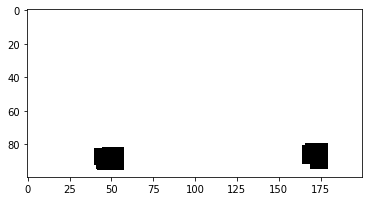

In [64]:
part = img4[200:300,400:600]
plt.imshow(part,cmap='gray')

In [ ]:
winName = "imgs"
kernel = np.ones([10,10])
df = pd.DataFrame(columns=['paths','fileName','Left X','Left Y','Right X','Right Y'])
for i in range(frontPaths):
    esc = False
    img = cv2.imread(frontPaths[i])
    cv2.namedWindow(winName)
    # resize img form (5184 * 3456)  --> to (518 * 345)
    resizedImg = cv2.resize(img,(518*2,345*2))
    cv2.setMouseCallback(winName,frontMouseParams)
    
    
    cv2.imshow(winName,resizedImg)
    while(1):
        key = cv2.waitKey()
        if esc == True:
            break
            
        # when ESC Pressed
        if key ==27:
            cv2.destroyAllWindows()
            esc = True
            break
        elif key == 32:
            grayImg = cv2.cvtColor(resizedImg,cv2.COLOR_RGB2GRAY)
            dilImg = cv2.dilate(grayImg, kernel)
            eroImg = cv2.erode(dilImg, kernel)
            ret, otsuImg = cv2.threshold(eroImg, 70, 255, cv2.THRESH_BINARY)
            cv2.imshow("closing img",otsuImg)
            cv2.destroyAllWindows()
            break

    
        else :
            continue
            
print(df)